In [1]:
# import a nessary liberaries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
# import the file 
ds_jobs = pd.read_csv("D:\\customer_train.csv")
ds_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
# Create a copy from ds_jobs to transform
ds_jobs_transform = ds_jobs.copy()
# EDA to help identify ordinal, nominal, and two-factor categories 
for col in ds_jobs.select_dtypes("object").columns :
    print(ds_jobs_transform[col].value_counts() , '\n')

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64 

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64 

relevant_experience
Has relevant experience    13792
No relevant experience      5366
Name: count, dtype: int64 

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64 

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64 

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64 

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7 

In [47]:
# Create a dictionary of columns containing ordered categorical data
ordered_cats ={
    "enrolled_university":["Primary School","High School","Graduate","Masters","Phd"],
    "enrolled_university":["no_enrollment","Part time course","Full time course"],
    "experience":["<1"]+list(map(str,range(1,21)))+[">20"],
    "company_size":["<10","10-49","50-99","100-499","500-999","1000-4999","5000-9999","10000+"],
    "last_new_job":["never","1","2","3","4",">4"]
}
# Create a mapping dictionary of columns containing two-factor categories to convert to Booleans
two_factors_cat = {
    'relevant_experience': {'No relevant experience': False, 'Has relevant experience': True},
    'job_change': {0.0: False, 1.0: True}
}

# Loop through DataFrame columns to efficiently change data type
for col in ds_jobs_transform :
    # Convert two-factor categories to bool
    if col in ["relevant_experience","job_change"] :
        ds_jobs_transform[col]=ds_jobs_transform[col].map(two_factors_cat[col])
    # Convert integer columns to int32
    elif col in ['student_id', 'training_hours'] :
        ds_jobs_transform[col]=ds_jobs_transform[col].astype('int32')
    # Convert float columns to float16
    elif col in col=="city_development_index":
        ds_jobs_transform[col]=ds_jobs_transform[col].astype('float16')
    # Convert columns containing ordered categorical data to ordered categories using dict
    elif col in ordered_cats.keys():
        category=pd.CategoricalDtype(ordered_cats[col],ordered=True)
        ds_jobs_transform[col]=ds_jobs_transform[col].astype(category)
    # Convert remaining columns to standard categories
    else:
        ds_jobs_transform[col]=ds_jobs_transform[col].astype('category')



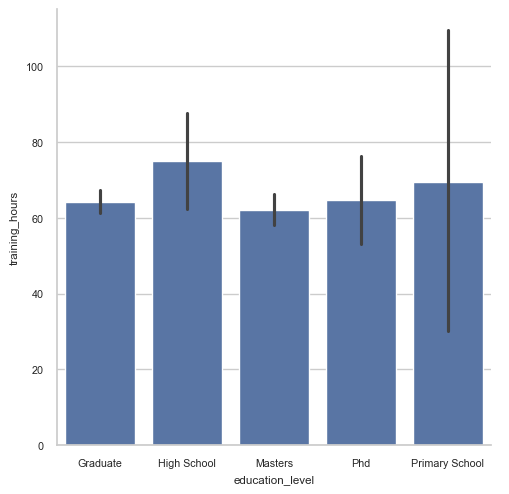

In [71]:
# visualize the data and get relations between columns 
sns.set(font_scale=.7)
sns.set_style("whitegrid")
sns.catplot(x="education_level",y="training_hours",data=ds_jobs_transform,kind="bar")
plt.show()


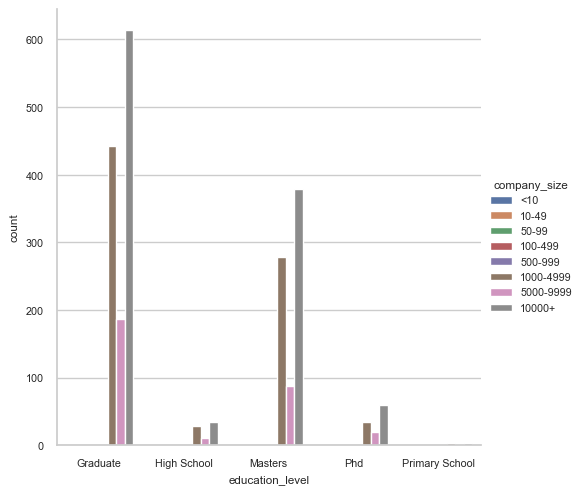

In [91]:
# visualize the data and get relations between columns 
sns.set(font_scale=.7)
sns.set_style("whitegrid")
sns.catplot(x="education_level",data=ds_jobs_transform,kind="count",hue='company_size')
plt.show()